Los datos  se encuentran en la máquina virtual:

`/home/dsc/Data/challenge`:
- `bookings.csv.bz2`
- `searches.csv.bz2`

## Exercise 1

#### Count the number of lines in Python for each file

[How to decompress a .bz2 file](https://superuser.com/questions/480950/how-to-decompress-a-bz2-file)

- Modify original content: `bzip2 -d filename.bz2`
- Preserve original content: `bzip2 -dk filename.bz2`


[How can I view a compressed file content](https://stackoverflow.com/questions/12646843/how-can-i-view-a-compressed-file-content)

You can use bzcat and pipe its output:

     echo '1' > test
     bzip2 test
     bzcat test.bz2
     >>> 1


[Passing Values to and from the Shell](https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html#Passing-Values-to-and-from-the-Shell)

You can save the output of any shell command to a Python list using the assignment operator:
 
    In [4]: contents = !ls

    In [5]: print(contents)
    ['myproject.txt']
    
Communication in the other direction–passing Python variables into the shell–is possible using the {varname} syntax:

    In [9]: message = "hello from Python"

    In [10]: !echo {message}
    hello from Python

In [1]:
!ls /home/dsc/Data/challenge

bookings.csv.bz2  searches.csv.bz2


Dado que son archivos muy grandes, hacemos un archivo con una muestra de las 10000 primeras filas, y manejaremos ese en adelante para las pruebas iniciales.

In [2]:
!bzcat /home/dsc/Data/challenge/bookings.csv.bz2 | head -n 10000 > bookings.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = /home/dsc/Data/challenge/bookings.csv.bz2, output file = (stdout)


In [3]:
!bzip2 -f bookings.sample.csv

In [4]:
!ls -l

total 784
-rw-rw-r-- 1 dsc dsc 535893 nov 21 09:13 bookings.sample.csv.bz2
-rwxrwxrwx 1 dsc dsc  18535 nov 21 09:13 DS_Challenge_Mario.ipynb
-rw-rw-r-- 1 dsc dsc 244720 nov 20 21:48 searches.sample.csv.bz2


Confirmamos que ya tenemos un archivo "juguete" para empezar a trabajar.

In [5]:
%%time

!bzcat bookings.sample.csv.bz2 | wc -l

10000
CPU times: user 22.7 ms, sys: 8.84 ms, total: 31.5 ms
Wall time: 906 ms


In [6]:
import bz2

In [7]:
fileBz2 = bz2.BZ2File('bookings.sample.csv.bz2')

In [8]:
type(fileBz2)

bz2.BZ2File

In [9]:
fileBz2 = bz2.BZ2File('bookings.sample.csv.bz2')

k = 0
for line in fileBz2:
    k += 1
print(k)

10000


In [10]:
fileBz2.closed

False

In [11]:
fileBz2.close()

Para evitar el problema de olvidar cerrar el archivo...

In [12]:
with bz2.BZ2File('bookings.sample.csv.bz2') as fileBz2:
    k = 0
    for line in fileBz2:
        k += 1
# Cuando sales del "with" se cierra el archivo, y se previene así el problema del puntero
print(k)

10000


In [13]:
!bzcat /home/dsc/Data/challenge/bookings.csv.bz2 | head -n 10000 > searches.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = /home/dsc/Data/challenge/bookings.csv.bz2, output file = (stdout)


In [14]:
!bzip2 -f searches.sample.csv

In [15]:
%%time

!bzcat searches.sample.csv.bz2 | wc -l

10000
CPU times: user 16.9 ms, sys: 4.78 ms, total: 21.7 ms
Wall time: 671 ms


In [16]:
with bz2.BZ2File('searches.sample.csv.bz2') as fileBz2:
    k = 0
    for line in fileBz2:
        k += 1
# Cuando sales del "with" se cierra el archivo, y se previene así el problema del puntero
print(k)

10000


In [17]:
# Comprobación de que está cerrado:
fileBz2.closed

True

## Exercise 2

#### Top 10 arrival airports in the world in 2013 (using the bookings file)

- Arrival airport is the column arr_port. It is the IATA code for the airport
- To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).
- Print the top 10 arrival airports in the standard output, including the number of passengers.
- **Bonus point**: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at **GeoBases in Github**)
- **Bonus point**: Solve this problem using pandas (instead of any other approach)

[Large, persistent DataFrame in pandas](https://stackoverflow.com/questions/11622652/large-persistent-dataframe-in-pandas/12193309#12193309)

In [18]:
# %%time

# import pandas as pd

# tp = pd.read_csv('/home/dsc/Data/challenge/bookings.csv.bz2', sep='^', iterator=True, chunksize=1000)  # gives TextFileReader, which is iterable with chunks of 1000 rows.
# # df = pd.concat(tp, ignore_index=True)  # df is DataFrame. If errors, do `list(tp)` instead of `tp`

# for chunk in tp:
#     cols = chunk.columns
#     new_cols = []
#     for col in cols:
#         new_col = col.strip()
#         new_cols.append(new_col)
#     chunk.columns = new_cols
#     break
# chunk.columns

In [19]:
# %%time

# arr_port = ! bzcat /home/dsc/Data/challenge/bookings.csv.bz2 | cut -d "^" -f 13

In [20]:
# Trabajando con el sample:

import pandas as pd

df = pd.read_csv('bookings.sample.csv.bz2', sep='^')
df.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [21]:
df.columns

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ',
       'rloc          ', 'cre_date           ', 'duration', 'distance',
       'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry',
       'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry',
       'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry',
       'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class',
       'brd_time           ', 'off_time           ', 'pax', 'year', 'month',
       'oid      '],
      dtype='object')

In [22]:
new_cols = []
for col in df.columns:
    new_col = col.strip()
    new_cols.append(new_col)
    
df.columns = new_cols
df.columns

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry',
       'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry',
       'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry',
       'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier',
       'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year',
       'month', 'oid'],
      dtype='object')

In [23]:
df['rloc'].nunique()

3638

In [24]:
df.groupby(['arr_port']).sum()

,duration,distance,intl,pax,year,month
arr_port,,,,,,
AAL,128,476,0,0,4026,6
ABQ,132562,0,0,12,24156,36
ABV,655719,890,4,2,12078,18
ABZ,373104,0,6,-6,12078,18
ACC,753561,8252,12,4,24156,36
...,...,...,...,...,...,...
YZF,11194,0,2,4,4026,6
ZAG,164584,108,4,-4,12078,18
ZNZ,96800,0,3,1,10065,15


In [25]:
df[df['arr_port'] == "ABQ"]

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid


In [26]:
# Los códigos IATA tienen espacios!!

df['arr_port'].unique()

array(['LHR     ', 'CLT     ', 'SVO     ', 'LGA     ', 'SIN     ',
       'TUS     ', 'CTA     ', 'YWG     ', 'PVG     ', 'SGC     ',
       'ALG     ', 'DMM     ', 'LED     ', 'LIS     ', 'BLR     ',
       'BWI     ', 'DEL     ', 'TPA     ', 'MNL     ', 'ULN     ',
       'ZRH     ', 'ALA     ', 'FCO     ', 'AYT     ', 'MVD     ',
       'CVG     ', 'OTP     ', 'CDG     ', 'HAV     ', 'NRT     ',
       'BKK     ', 'MEX     ', 'SAV     ', 'EWR     ', 'SFO     ',
       'DTW     ', 'OMA     ', 'YVR     ', 'ACC     ', 'SDF     ',
       'CAI     ', 'TLV     ', 'ELP     ', 'HMO     ', 'LAS     ',
       'BOI     ', 'TYR     ', 'ATL     ', 'IST     ', 'BBI     ',
       'ISB     ', 'LCA     ', 'FRA     ', 'CAG     ', 'DCA     ',
       'COS     ', 'SHA     ', 'DAY     ', 'MCO     ', 'BOS     ',
       'TIA     ', 'SKG     ', 'LCY     ', 'SJD     ', 'DFW     ',
       'LAX     ', 'ADD     ', 'PHX     ', 'LIR     ', 'SYD     ',
       'MIA     ', 'MCI     ', 'YHZ     ', 'STL     ', 'OGG   

In [27]:
# Modificamos pues los valores de la columna:

df['arr_port'] = df['arr_port'].str.strip()

In [28]:
df[df['arr_port'] == "ABQ"]

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
1606,2013-03-04 00:00:00,1S,US,a098002ed8b9feee624f1913b17e2c68,07729d8f3cedcef60646e9312a1b757d,c3111765a421af81cb7c54f16e141d42,2013-03-04 00:00:00,4259,0,DEN,...,DENABQ,FK,V,Y,2013-03-10 18:35:00,2013-03-10 20:02:40,1,2013,3,NULL
1607,2013-03-04 00:00:00,1S,US,a098002ed8b9feee624f1913b17e2c68,07729d8f3cedcef60646e9312a1b757d,c3111765a421af81cb7c54f16e141d42,2013-03-04 00:00:00,4259,0,DEN,...,ABQDEN,FK,S,Y,2013-03-13 16:07:00,2013-03-13 17:34:40,1,2013,3,NULL
3341,2013-03-11 00:00:00,1V,US,ca452f344681a6a0d2779745d598bd3d,3a5600f7bffa5074f4d56794133dd11b,cbbd279a09b9f18fbe47c5258bfebdd7,2013-03-11 00:00:00,20739,0,PSC,...,PSCSLCABQ,NV,U,Y,2013-03-29 06:24:00,2013-03-29 11:30:58,1,2013,3,NULL
3342,2013-03-11 00:00:00,1V,US,ca452f344681a6a0d2779745d598bd3d,3a5600f7bffa5074f4d56794133dd11b,cbbd279a09b9f18fbe47c5258bfebdd7,2013-03-11 00:00:00,20739,0,PSC,...,ABQSLCPSC,NV,U,Y,2013-04-12 12:30:00,2013-04-12 16:03:01,1,2013,3,NULL
6023,2013-03-18 00:00:00,1V,US,73d2bd747515516040ec806a72ff7fb2,0ea791cd1d8b35e744dc1a3f0e2191a0,eeab1e9216dc323fb9c3bb52ac4ddc63,2013-03-18 00:00:00,6479,0,AUS,...,AUSDFWABQ,KK,G,Y,2013-04-01 07:20:00,2013-04-01 10:02:27,1,2013,3,NULL
6024,2013-03-18 00:00:00,1V,US,73d2bd747515516040ec806a72ff7fb2,0ea791cd1d8b35e744dc1a3f0e2191a0,eeab1e9216dc323fb9c3bb52ac4ddc63,2013-03-18 00:00:00,6479,0,AUS,...,ABQDFWAUS,KK,S,Y,2013-04-05 14:20:00,2013-04-05 19:19:36,1,2013,3,NULL
6025,2013-03-28 00:00:00,1V,US,73d2bd747515516040ec806a72ff7fb2,0ea791cd1d8b35e744dc1a3f0e2191a0,eeab1e9216dc323fb9c3bb52ac4ddc63,2013-03-18 00:00:00,6479,0,AUS,...,AUSDFWABQ,KK,G,Y,2013-04-01 07:20:00,2013-04-01 10:02:27,-1,2013,3,NULL
6026,2013-03-28 00:00:00,1V,US,73d2bd747515516040ec806a72ff7fb2,0ea791cd1d8b35e744dc1a3f0e2191a0,eeab1e9216dc323fb9c3bb52ac4ddc63,2013-03-18 00:00:00,6479,0,AUS,...,AUSDFWABQ,KK,X,Y,2013-04-01 07:20:00,2013-04-01 10:02:27,1,2013,3,NULL
6464,2013-03-04 00:00:00,1V,US,12c5c16e96fedbc2af592ea4e9bc29d8,777fe6e953d2e578532f910519809c75,91112b50b06760e43a7b61c92d36f69c,2013-03-04 00:00:00,7660,0,ATL,...,ATLABQ,NV,H,Y,2013-03-10 11:01:00,2013-03-10 12:12:48,1,2013,3,NULL
6465,2013-03-04 00:00:00,1V,US,12c5c16e96fedbc2af592ea4e9bc29d8,777fe6e953d2e578532f910519809c75,91112b50b06760e43a7b61c92d36f69c,2013-03-04 00:00:00,7660,0,ATL,...,ABQATL,NV,H,Y,2013-03-15 13:30:00,2013-03-15 18:41:48,1,2013,3,NULL


In [29]:
df['abs_pax'] = df['pax'].abs()
df[['pax', 'abs_pax']]

,pax,abs_pax
0,-1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
9994,2,2
9995,2,2
9996,-2,2
9997,2,2


In [30]:
# Ahora que hemos comprobado que está bien formateado:

group = df.groupby(['arr_port']).sum().sort_values(by='abs_pax', ascending=False)
group['abs_pax'][0:10]

arr_port
JFK    300
LHR    288
LAX    285
CDG    238
PVG    223
SFO    221
MCO    212
HKG    210
JED    206
MNL    201
Name: abs_pax, dtype: int64

In [31]:
dir(df)

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__re

In [32]:
df['pax']

0      -1
1       1
2       1
3       1
4       1
       ..
9994    2
9995    2
9996   -2
9997    2
9998    2
Name: pax, Length: 9999, dtype: int64

In [40]:
%%time

import pandas as pd
from tqdm import tqdm

tp = pd.read_csv('/home/dsc/Data/challenge/bookings.csv.bz2', usecols=['arr_port', 'pax'], sep='^', iterator=True, chunksize=10000)  # gives TextFileReader, which is iterable with chunks of 1000 rows.
# tp = pd.read_csv('bookings.sample.csv.bz2', usecols=['arr_port', 'pax'], sep='^', iterator=True, chunksize=2500)  # gives TextFileReader, which is iterable with chunks of 1000 rows.

filas = 0
iter_max = 1e8 # Usar '5' para test

df_all = pd.DataFrame()
for k, chunk in tqdm(enumerate(tp)):
    filas += len(chunk)
    # print(len(chunk)) # Comprobador
    new_cols = []
    for col in chunk.columns:
        new_col = col.strip()
        new_cols.append(new_col) 
    chunk.columns = new_cols
    chunk['arr_port'] = chunk['arr_port'].str.strip().str.upper()
    # chunk['abs_pax'] = chunk['pax'].abs() # Se elimina esto para que las cancelaciones resten, anulándose
    group_chunk = chunk.groupby('arr_port').sum()
    df_all = df_all.append(group_chunk).sort_values(by='pax', ascending=False)

    if k == iter_max: # Comprobador
        break # Comprobador


1001it [18:47,  1.13s/it]

CPU times: user 14min 52s, sys: 17.8 s, total: 15min 10s
Wall time: 18min 47s


In [41]:
filas

10000010

In [45]:
df_all.groupby('arr_port').sum().sort_values(by='pax', ascending=False) # FUNCIONAAAAA

,pax
arr_port,
LHR,88809.0
MCO,70930.0
LAX,70530.0
LAS,69630.0
JFK,66270.0
...,...
MYJ,-80.0
UPG,-90.0
XWG,-90.0


## Exercise 3

#### Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

- For the arriving airport, you can use the Destination column in the searches file.
- Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.
- **Bonus point**: Solving this problem using pandas (instead of any other approach)

In [54]:
!bzcat /home/dsc/Data/challenge/searches.csv.bz2 | head -n 50000 > searches.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = /home/dsc/Data/challenge/searches.csv.bz2, output file = (stdout)


In [55]:
!bzip2 -f searches.sample.csv

In [56]:
%%time

!bzcat searches.sample.csv.bz2 | wc -l

50000
CPU times: user 51.5 ms, sys: 16.1 ms, total: 67.6 ms
Wall time: 2.19 s


In [57]:
with bz2.BZ2File('searches.sample.csv.bz2') as fileBz2:
    k = 0
    for line in fileBz2:
        k += 1
# Cuando sales del "with" se cierra el archivo, y se previene así el problema del puntero
print(k)

50000


In [58]:
# Comprobación de que está cerrado:
fileBz2.closed

True

```python
%%time

import pandas as pd
from tqdm import tqdm

tp = pd.read_csv('searches.sample.csv.bz2', sep='^', iterator=True, chunksize=10000)

filas = 0
iter_max = 1e0 # Usar '5' para test

with open('003_sample_chunks', mode='w') as file:
for k, chunk in tqdm(enumerate(tp)):
    
    
    
    df_all = df_all.append(group_chunk, ignore_index=True)

    if k == iter_max: # Comprobador
        break # Comprobador
        
    filas += len(chunk)
```

In [64]:
searches_sample = pd.read_csv('searches.sample.csv.bz2',
                              usecols=['Date','Destination'],
                              sep='^')

In [86]:
searches_sample.shape

(49999, 4)

In [65]:
searches_sample.columns

Index(['Date', 'Destination'], dtype='object')

In [66]:
searches_sample.sample(5)

,Date,Destination
2154,2013-01-03,BAH
9953,2013-01-10,MUC
37310,2013-02-07,PAD
3637,2013-01-04,HYD
16487,2013-01-17,CHC


In [72]:
searches_sample.dtypes

Date           object
Destination    object
dtype: object

In [77]:
searches_sample['year'] = searches_sample['Date'].str[:4]
searches_sample['month'] = searches_sample['Date'].str[5:7]
searches_sample.sample(5)

,Date,Destination,year,month
2599,2013-01-03,YHZ,2013,01
42590,2013-02-12,FUE,2013,02
30365,2013-01-31,MBJ,2013,01
23738,2013-01-24,SIN,2013,01
22686,2013-01-23,KTM,2013,01


In [81]:
cities = ['AGP', 'MAD', 'BCN']
df2 = searches_sample[searches_sample['Destination'].isin(cities)].copy()
df2.sample(10)

,Date,Destination,year,month
17184,2013-01-18,BCN,2013,01
797,2013-01-01,BCN,2013,01
46576,2013-02-16,MAD,2013,02
19208,2013-01-20,BCN,2013,01
44813,2013-02-14,MAD,2013,02
18202,2013-01-19,BCN,2013,01
8520,2013-01-09,AGP,2013,01
35976,2013-02-05,BCN,2013,02
41225,2013-02-11,MAD,2013,02
42339,2013-02-12,MAD,2013,02


In [88]:
df2.shape

(1849, 4)

In [101]:
df3 = df2.groupby(['Destination', 'year', 'month']).count().reset_index()
df3

,Destination,year,month,Date
0,AGP,2013,01,169
1,AGP,2013,02,97
2,BCN,2013,01,517
3,BCN,2013,02,357
4,MAD,2013,01,425
5,MAD,2013,02,284


In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='month', ylabel='Date'>

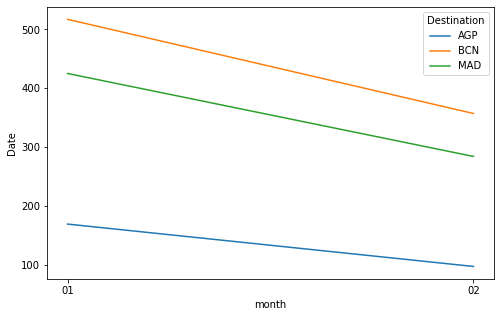

In [114]:
fig,ax1 = plt.subplots(figsize=(8,5))
sns.lineplot(data=df3[df3['year'] == '2013'],
            x='month',
            y='Date',
            hue='Destination',
            ax=ax1)

In [130]:
with bz2.BZ2File('/home/dsc/Data/challenge/searches.csv.bz2') as fileBz2:
    k = 0
    for line in fileBz2:
        k += 1
# Cuando sales del "with" se cierra el archivo, y se previene así el problema del puntero
print(k)

20390199


In [131]:
# Resultado: 20390199 filas

In [133]:
ChunkSize=1e5
nfilas = 20390199
iter_max = nfilas // ChunkSize + 1
iter_max

204.0

In [ ]:
%%time
# Eliminar los duplicates del archivo completo y creación del archivo resultante:
tp = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',
                 sep='^', 
                 iterator=True,
                 chunksize=2e6)
all_chunks = pd.DataFrame()

for i, chunk in enumerate(tp):
    print(i, len(all_chunks))
    all_chunks = all_chunks.append(chunk)
    all_chunks.drop_duplicates(inplace=True) # Eliminar todos los duplicados totales

# Aprovechar para limpiar tanto etiquetas de columnas como strings de algunas columnas:
all_chunks.columns = all_chunks.columns.str.strip()
all_chunks['Origin'] = all_chunks['Origin'].str.strip().str.upper()
all_chunks['Destination'] = all_chunks['Destination'].str.strip().str.upper()

all_chunks.to_csv('searches_without_dupl.csv.bz2',
                  sep='^',
                  index=False)

# NOTA: el resultado tras cada chunk es idéntico porque todos los registros únicos se encuentran entre
#       las primeras 2M de filas

In [134]:
%%time

# Importar las librerías necesarias:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Importa el archivo, troceándolo en chunks (20390199 filas):
ChunkSize=1e5
nfilas = 20390199
tp = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',
                 sep='^',
                 usecols=['Date','Destination'], 
                 iterator=True,
                 chunksize=ChunkSize)
# Inicializa el contador de filas:
filas = 0
# TEST: número de iteraciones máximas para testeo
iter_max = nfilas // ChunkSize + 1
# Crear un DataFrame vacío para appendear cada resultado de los chunks:
df4 = pd.DataFrame()

# Iterar por cada chunk:
for k, chunk in tqdm(enumerate(tp)):
    # TEST: al llegar al número máximo de iteraciones permitido, interrumpe el proceso:
    if k == iter_max: # Comprobador
        break # Comprobador
    # Contador de filas total (chunk a chunk)
    filas += len(chunk)
    # Crear columnas auxiliares de Año y Mes:
    chunk['year'] = chunk['Date'].str[:4]
    chunk['month'] = chunk['Date'].str[5:7]
    # Listar las ciudades (IATAs) buscadas:
    cities = ['AGP', 'MAD', 'BCN']
    # Filtrar por las ciudades buscadas:
    df2 = chunk[chunk['Destination'].isin(cities)]
    # Agrupar primero por Ciudad, luego por Año, y finalmente por Mes (reset_index para formato por columnas):
    df3 = df2.groupby(['Destination', 'year', 'month']).count().reset_index()
    # Appendear el grupo resultante al DataFrame inicialmente vacío (df4):
    df4 = df4.append(df3)


# Imprime el contador de filas:
print(filas)

# TEST: muestra el df4 resultante para inspeccionar:
df4

204it [10:13,  3.01s/it]

20390198
CPU times: user 8min 41s, sys: 662 ms, total: 8min 42s
Wall time: 10min 13s


,Destination,year,month,Date
0,AGP,2013,01,169
1,AGP,2013,02,147
2,AGP,2013,03,187
3,AGP,2013,04,31
4,BCN,2013,01,517
...,...,...,...,...
7,BCN,2013,10,172
8,MAD,2013,07,199
9,MAD,2013,08,383
10,MAD,2013,09,371


<AxesSubplot:xlabel='month', ylabel='Date'>

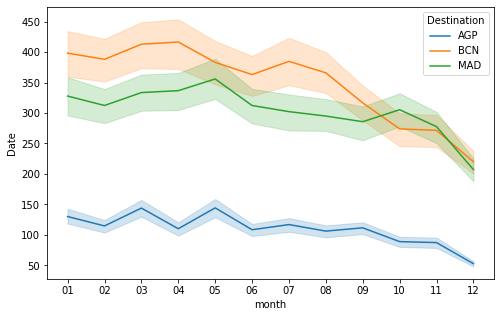

In [135]:
# Plotea el resultado final
fig,ax1 = plt.subplots(figsize=(8,5))
sns.lineplot(data=df4[df4['year'] == '2013'],
            x='month',
            y='Date',
            hue='Destination',
            ax=ax1)

## Exercise 4

#### Match searches with bookings

- For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match.
- For the bookings file, origin and destination are the columns dep_port and arr_port, respectively.
- Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.